#### アンサンブル学習
- https://www.youtube.com/watch?v=8BSYmfm8X7s @youtube by いまにゅのプログラミング塾
- https://www.youtube.com/watch?v=h0p6RiuhdrE @youtube by ウマたん
- https://www.youtube.com/watch?v=0WcrBe017-w (前編)
- https://www.youtube.com/watch?v=aeb3dgMcF2I (後編) @youtube by Able Programming

- Kaggleで勝つデータ分析の技術 @本

#### ブレンディング
#### バギング
#### スタッキング

## 1.このSprintについて

### Sprintの目的
- アンサンブル学習について理解する

### どのように学ぶか
スクラッチでアンサンブル学習の各種手法を実装していきます。



## 2.アンサンブル学習

3種類のアンサンブル学習をスクラッチ実装していきます。そして、それぞれの効果を小さめのデータセットで確認します。


- ブレンディング
- バギング
- スタッキング

### 小さなデータセットの用意
以前も利用した回帰のデータセットを用意します。


House Prices: Advanced Regression Techniques(下記URL)

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。


train.csvを学習用（train）8割、検証用（val）2割に分割してください。

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('train.csv' )

In [ ]:
#学習モデル
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
#from sklearn.xgboost import xgboostregressor
#import lightgbm as lgb


# 評価指標
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [366]:
df = df[['GrLivArea','YearBuilt','SalePrice']]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


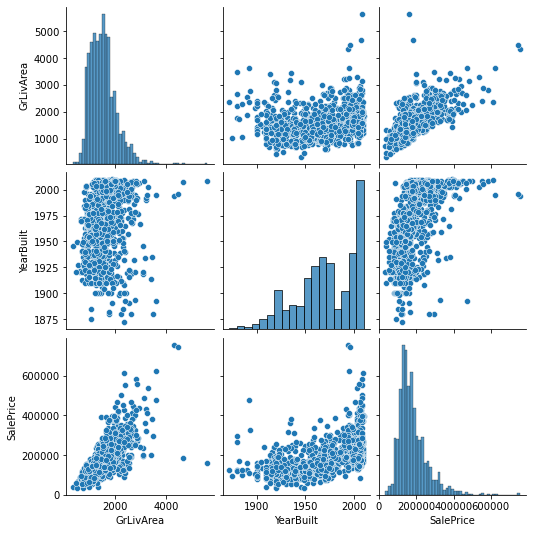

In [263]:
sns.pairplot(df)

In [367]:
log_df  = df.apply(np.log1p)

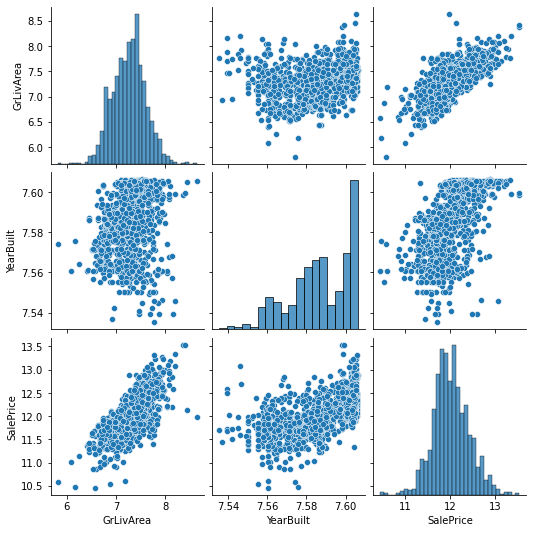

In [264]:
sns.pairplot(log_df)

In [368]:
log_df_x = log_df.drop('SalePrice', axis = 1).values
log_df_y = log_df['SalePrice'].values

### scikit-learn
単一のモデルはスクラッチ実装ではなく、scikit-learnなどのライブラリの使用を推奨します。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation(下記URL)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


sklearn.svm.SVR — scikit-learn 0.21.3 documentation(下記URL)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html


sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation(下記URL)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


## 3.ブレンディング

## 【問題1】ブレンディングのスクラッチ実装
**ブレンディング** をスクラッチ実装し、単一モデルより精度があがる例を **最低3つ** 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。

### ブレンディングとは
ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。


- 法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）
- ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
- 入力データの前処理の仕方（例：標準化、対数変換、PCAなど）

重要なのはそれぞれのモデルが大きく異なることです。


回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。


**《補足》**


分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。


sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation(下記URL)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [402]:
#正規化したデータで検証
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(log_df_x,  log_df_y, train_size = 0.8, random_state = None)

In [403]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_ypre =lr.predict(X_valid)

In [404]:
from sklearn.svm import SVR, LinearSVR
svm = SVR().fit(X_train, y_train)
svm_ypre = svm.predict(X_valid)

In [405]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_ypre =tree.predict(X_valid)

In [406]:
#重み付け
lr_svm_tree =  (lr_ypre *0.5 +svm_ypre *0.45 +tree_ypre *0.05)
print('線形 MSE test data: ', mean_squared_error(y_valid, lr_ypre))
print('SVM MSE test data: ', mean_squared_error(y_valid, svm_ypre))
print('決定木 MSE test data: ', mean_squared_error(y_valid, tree_ypre))
print('Blending MSE test data: ', mean_squared_error(y_valid, lr_svm_tree))

線形 MSE test data:  0.05201606108518619
SVM MSE test data:  0.04987468631817287
決定木 MSE test data:  0.06227721153272704
Blending MSE test data:  0.04791536014740856


In [407]:
#平均値
lr_svm_tree = np.mean([lr_ypre, svm_ypre, tree_ypre], axis = 0)
print('線形 MSE test data: ', mean_squared_error(y_valid, lr_ypre))
print('SVM MSE test data: ', mean_squared_error(y_valid, svm_ypre))
print('決定木 MSE test data: ', mean_squared_error(y_valid, tree_ypre))
print('Blending MSE test data: ', mean_squared_error(y_valid, lr_svm_tree))

線形 MSE test data:  0.05201606108518619
SVM MSE test data:  0.04987468631817287
決定木 MSE test data:  0.06227721153272704
Blending MSE test data:  0.04354898597509079


- 訓練データと検証データに分ける
- 訓練データでそれぞれのモデルに学習させた後、予測(所謂y_pred)を出す。
- それぞれ出た予測に対して1.0になるように重み付け(0.3とか0.4で掛ける)をして
- その重み付けで出た予測データを全部足し合わせる
- 全部足し合わせた予測データで、目的変数の検証データを用いてスコアを出す

### ここまで自分の

## 前期の増田さんのを見ながら

In [287]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = [LinearRegression(), SVR(), DecisionTreeRegressor()]

kf = KFold(n_splits = 5, random_state= None, shuffle = False)

for regr in model:
    result = cross_val_score(regr, log_df_x, log_df_y, cv = kf, scoring = "neg_mean_squared_error")
    result_mean = np.mean(result)
    
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean), 'MODEL:', str(regr))

CV_MSE_MEAN:-0.046 MODEL: LinearRegression()
CV_MSE_MEAN:-0.047 MODEL: SVR()
CV_MSE_MEAN:-0.072 MODEL: DecisionTreeRegressor()


In [385]:
# 訓練データ、検証データに分割（ホールドアウト法）
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
train_test_split(log_df_x,log_df_y,train_size=0.8,random_state=None)

#### ブレンディング1

In [386]:
regr1 = LinearRegression().fit(X_train, y_train)
regr2 = SVR().fit(X_train, y_train)
regr3 = DecisionTreeRegressor().fit(X_train, y_train)

y_pred1 = regr1.predict(X_valid)
y_pred2 = regr2.predict(X_valid)
y_pred3 = regr3.predict(X_valid)

#推定値を平均する
y_pred_blend1 = np.mean([y_pred1, y_pred2, y_pred3], axis =0)

# 評価
mse = mean_squared_error(y_valid, y_pred_blend1)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred_blend1)

print('MSE:{:.3f}'.format(mse))

MSE:0.041


#### ブレンディング2

In [387]:
#交差検証(クロスバリデーション)
kf = KFold(n_splits =5, random_state =None, shuffle=False)

params = [1, 10, 20]

# 評価指標 MSE, 5分割で検証
for rn in params:
    #単一モデル
    regr = DecisionTreeRegressor(random_state = rn)
    result = -cross_val_score(regr, log_df_x, log_df_y, cv = kf, scoring = "neg_mean_squared_error")
    result_mean = np.mean(result)
    
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean), 'MODEL:', str(regr))

CV_MSE_MEAN:0.071 MODEL: DecisionTreeRegressor(random_state=1)
CV_MSE_MEAN:0.071 MODEL: DecisionTreeRegressor(random_state=10)
CV_MSE_MEAN:0.071 MODEL: DecisionTreeRegressor(random_state=20)


In [388]:
regr1 = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
regr2 = DecisionTreeRegressor(random_state=10).fit(X_train, y_train)
regr3 = DecisionTreeRegressor(random_state=20).fit(X_train, y_train)

y_pred1 = regr1.predict(X_valid)
y_pred2 = regr2.predict(X_valid)
y_pred3 = regr3.predict(X_valid)

#推定値を平均する
y_pred_blend2 = np.mean([y_pred1, y_pred2, y_pred3], axis = 0)

# 評価
mse = mean_squared_error(y_valid, y_pred_blend2)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred_blend2)

print('MSE:{:.3f}'.format(mse))

MSE:0.069


#### ブレンディング3

In [329]:
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(df)

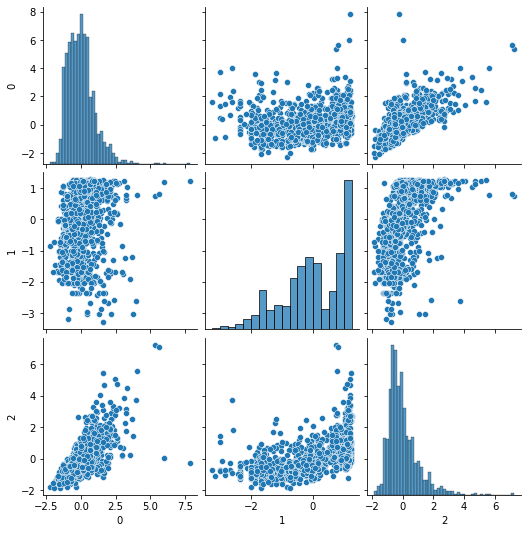

In [330]:
sns.pairplot(pd.DataFrame(std_df));

In [331]:
std_df_x = std_df[:, :-1]
std_df_y = std_df[:, -1]

In [413]:
#標準化したもので検証
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
train_test_split(std_df_x, std_df_y, train_size =0.8, random_state =None)

In [394]:
#単一モデル
model = [LinearRegression(),
                SVR(),
                DecisionTreeRegressor()]

kf = KFold(n_splits = 5, random_state= None, shuffle = False)

for regr in model:
    result = -cross_val_score(regr, std_df_x, std_df_y, cv = kf, scoring = "neg_mean_squared_error")
    result_mean = np.mean(result)
    
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean), 'MODEL:', str(regr))

CV_MSE_MEAN:0.352 MODEL: LinearRegression()
CV_MSE_MEAN:0.314 MODEL: SVR()
CV_MSE_MEAN:0.443 MODEL: DecisionTreeRegressor()


In [414]:
lr = LinearRegression().fit(X_train, y_train)
lr_ypre =lr.predict(X_valid)

svm = SVR().fit(X_train, y_train)
svm_ypre = svm.predict(X_valid)

tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_ypre =tree.predict(X_valid)

In [415]:
lr_svm_tree =  (lr_ypre *0.1 +svm_ypre *0.8 +tree_ypre *0.1)
print('線形 MSE test data: ', mean_squared_error(y_valid, lr_ypre))
print('SVM MSE test data: ', mean_squared_error(y_valid, svm_ypre))
print('決定木 MSE test data: ', mean_squared_error(y_valid, tree_ypre))
print('Blending MSE test data: ', mean_squared_error(y_valid, lr_svm_tree))

線形 MSE test data:  0.3318572089865157
SVM MSE test data:  0.27992973134167043
決定木 MSE test data:  0.34027951423747005
Blending MSE test data:  0.2656730005055168


In [416]:
lr_svm_tree =  np.mean([lr_ypre, svm_ypre, tree_ypre], axis = 0)
print('線形 MSE test data: ', mean_squared_error(y_valid, lr_ypre))
print('SVM MSE test data: ', mean_squared_error(y_valid, svm_ypre))
print('決定木 MSE test data: ', mean_squared_error(y_valid, tree_ypre))
print('Blending MSE test data: ', mean_squared_error(y_valid, lr_svm_tree))

線形 MSE test data:  0.3318572089865157
SVM MSE test data:  0.27992973134167043
決定木 MSE test data:  0.34027951423747005
Blending MSE test data:  0.2542086338701228


- 標準化したスコアのほうが正規化よりも良いスコアが出る
- 最後スコアをブレンディングする際は、正規化は平均を、標準化は平均でも重み付けどもその都度変わりそう→この辺りは統計っぽいのか？？

## 4.バギング

## 【問題2】バギングのスクラッチ実装
**バギング** をスクラッチ実装し、単一モデルより精度があがる例を **最低1つ** 示してください。

### バギングとは
バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（ **ブートストラップサンプル** ）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation(下記URL)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。


推定結果の平均をとる部分はブースティングと同様の実装になります。

In [423]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(log_df_x,  log_df_y, train_size = 0.8,  random_state = 73)

In [424]:
tree0 = DecisionTreeRegressor()
X_train0,X_,  y_train0, y_= train_test_split(X_train,  y_train, train_size=0.8 , shuffle = True, random_state = None)
tree0.fit(X_train0,y_train0)
tree0_ypre =tree0.predict(X_valid)

In [425]:
tree1 = DecisionTreeRegressor()
X_train0,X_,  y_train0, y_ = train_test_split(X_train,  y_train, train_size = 0.8, shuffle = True, random_state = None)
tree1.fit(X_train1,y_train1)
tree1_ypre =tree1.predict(X_valid)

In [426]:
tree2 = DecisionTreeRegressor()
X_train0,X_,  y_train0, y_ = train_test_split(X_train,  y_train, train_size = 0.8, shuffle = True, random_state = None)
tree2.fit(X_train2,y_train2)
tree2_ypre =tree2.predict(X_valid)

In [445]:
tree3_ypre = np.mean([tree0_ypre, tree1_ypre, tree2_ypre], axis =0)

print('tree0 MSE test data: ', mean_squared_error(y_valid, tree0_ypre))
print('tree1 MSE test data: ', mean_squared_error(y_valid, tree1_ypre))
print('tree2 MSE test data: ', mean_squared_error(y_valid, tree2_ypre))
print('Bagging MSE test data: ', mean_squared_error(y_valid, tree3_ypre))

tree0 MSE test data:  0.09221786464749604
tree1 MSE test data:  0.07661958267294422
tree2 MSE test data:  0.06476970248916866
Bagging MSE test data:  0.05711795884453773


- 訓練データと検証データで分ける
- 訓練データを再度、Baggingする為に、モデル毎に学習用に分ける！(おそらくここが分かりづらい)
- 学習出来たモデルは、最初に分けた時の検証データで予測値を出す→こうしないと、目的変数の検証データを統一出来ない
- N個出した予測値の平均値を出して、最後目的変数の検証データでスコアを出す

### ここまでは自分の

### 前期の増田さんのを見ながら

In [422]:
#単一モデル
model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = model.predict(X_valid)

# 評価
mse = mean_squared_error(y_valid, y_pred)
print('MSE;{:.3f}'.format(mse))

MSE;0.070


In [443]:
#バギング
n = 5
models = []

for i in range(n):
    X_bagging, X_, y_bagging, y_ = \
    train_test_split(X_train, y_train, train_size = 0.2, shuffle=True)
    
    model = DecisionTreeRegressor()
    model.fit(X_bagging, y_bagging)
    models.append(model)
    
y_pred = np.zeros(len(X_valid))

#上で作った配列にどんどん学習モデルごとの予測値が足されていく
for regr in models:
    pred = regr.predict(X_valid)
    y_pred += pred

#nで割るのは、model数分
y_pred = y_pred/n

#評価
mse = mean_squared_error(y_valid, y_pred)
print('MSE:{:.3f}'.format(mse))

MSE:0.047


## 5.スタッキング

## 【問題3】スタッキングのスクラッチ実装
スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

In [481]:
class Stacking():
    """
    スタッキングを行うクラス
    Parameters
    ------------
    max_depth : int
       スタッキングの最大学習深度
    splits : int
       ブレンドデータを作成する際のデータ分割数(CVの分割数)
    models : dictinary
       学習モデル{key:n_depth, values:モデル}を指定して渡す
    fit_models : list
      　学習済みモデルを保存するリスト
    """
    
    def __init__(self, max_depth, splits, models):
        self.max_depth = max_depth
        self.n_splits = splits
        self.models = models
        self.fit_models = []
        
    def blending(self, X, y, m):
        """
        ブレンドデータを作成する関数
        Parameters
        ------------
        X : 次の形のndarray, shape(n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape(n_samples, )
        m : class
            学習モデルのインスタンス
        """
        #Xの行数分の一次元配列を生成している
        self.y_blend = np.zeros(len(X))
        #print(self.y_blend)
        
        #訓練データを更に分割する:連続する値でn_splits分分けている
        kf = KFold(n_splits = self.n_splits, shuffle = False)
        
        #CV
        #kfは[学習データ][検証データ]順にn_splits分出てくる
        for train_index, valid_index in kf.split(X):
            X_train, X_valid = X[train_index], X[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
            
            
            """
            ここの一次元配列にしている理由を知りたい
            """
            #おそらくyを一次元配列にしている(flattenよりも早いらしい)
            #コメントアウトしても動いた・・・あれ？？？
            y_train = y_train.ravel()
            y_valid = y_valid.ravel()
            
            
            
            #トレインデータで学習モデルを作成
            regr = m
            regr.fit(X_train, y_train)
            self.fit_models.append(regr)
            
            #ブレンドデータ作成
            self.y_blend[valid_index] = regr.predict(X_valid)
            #print(self.y_blend[valid_index])
        
    def fit_(self, X, y, depth):
        """
        この深さのブレンディングデータを作成する関数
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データのラベル値
        depth : int
           このステージの深さ
        """
        self.depth = depth
        
        #最終学習モデル
        #色々学習して最後に１つの学習モデルでゴールする
        if self.depth == self.max_depth:
            self.model = self.models[self.depth]
            self.model.fit(X, y)
            return
        
        #この深さの学習モデルを準備
        models = self.models[self.depth]
        self.y_blending = np.zeros([len(X), len(models)])
        #print(models)
        
        #この深さの学習モデルでブレンドデータを作成
        for i, mdl in enumerate(models):
            #上に行ってらっしゃい
            self.blending(X, y, mdl)
            self.y_blending[:, i] = self.y_blend
        
        #次のステージのX(blend_y)
        blend_y = self.y_blending
        #print(blend_y)
        
        #再帰
        self.bld = Stacking(self.max_depth, self.n_splits, self.models)
        self.bld.fit_(blend_y, y, depth+1)
        
    def predict_(self, X):
        if self.depth == self.max_depth:
            y_pred = self.model.predict(X)
            return y_pred
        
        else:
            tmp = 0
            self.y_pred = np.zeros(len(X))
            self.y_next = np.zeros([len(X), len(self.models[self.depth])])
            
            for mdl in self.fit_models:
                tmp += 1
                self.y_pred += mdl.predict(X)
                
                if tmp%self.n_splits ==0:
                    self.y_pred = self.y_pred/self.n_splits
                    self.y_next[:, int(tmp/self.n_splits)-1] = self.y_pred
                    self.y_pred = np.zeros(len(X))
                    
                y_pred = self.bld.predict_(self.y_next)
                
            return y_pred    

In [514]:
model = {0:[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()], 
                1:[ARDRegression(), SGDRegressor(), DecisionTreeRegressor()], 
                2:[HuberRegressor(), ARDRegression(), RandomForestRegressor()], 
                3:HuberRegressor()
                 }

In [515]:
stk = Stacking(max_depth =3, splits = 5, models = model)
stk.fit_(X_train, y_train, 0)
y_pred = stk.predict_(X_valid)
#print(y_pred)

#評価
mse = mean_squared_error(y_valid, y_pred)
print('MSE : {:.3f}'.format(mse))

MSE : 0.036


### ↑↑↑上記は最終モデルまでのコーディングがあまり良くない。depth3にしないと動かない

### ↓↓↓今期の佐藤さんのを見ながら

In [526]:
class ScratchStacking():
    """
    スタッキングのスクラッチ実装
    
    base_models : ベースモデルのリスト
    meta_model : メタモデル
    n_splits : クロスバリデーション時の分割数
    """
    
    def __init__(self, base_models, meta_model, n_splits =4):
        #ハイパーパラメータを属性として記録
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_splits = n_splits
        
    """"
    fit
    学習を行う
    """
    def fit(self, X, y):
        
        #KFoldのインスタンス
        kf = KFold(n_splits = self.n_splits, shuffle =True)
        # oofの変数(空)
        oof = np.empty([X.shape[0], len(self.base_models)])
        
        #ベースモデルの数だけループ
        for i, base_model in enumerate(self.base_models):
            
            #学習済みモデルの変数(空)
            learned_models_list = []
            
            #クロスバリデーションを行うループ
            for train_index, test_index in kf.split(X):
                
                #ベースモデルで学習
                base_model.fit(X[train_index], y[train_index])
                #学習済みモデルをリストに追加
                learned_models_list.append(base_model)
                #推定
                y_pred = base_model.predict(X[test_index])
                #推定結果をoofに格納
                oof[test_index, i] = y_pred.ravel()
                
            #学習済みベースモデルのリストでベースモデルを上書き
            self.base_models[i] = learned_models_list
            
        #oofを特徴量としてメタモデルで学習
        self.meta_model.fit(oof, y)
    
    """
    predict
    推定を行う
    """
    def predict(self, X):
        
        new_features = np.empty([X.shape[0], len(self.base_models)])
        
        #ベースモデルの数だけループ
        for i, base_models in enumerate(self.base_models):
            #print(i)
            
            #予測値の変換(空)を宣言
            y_pred_list = np.empty((X.shape[0], len(base_models)))
            #print(y_pred_list)
            
            #ベースモデル(kfoldした分)の数だけループ　
            for j, base_model in enumerate(base_models):
                #print(j)
                
                #それぞれのモデルより予測値を取得し、リストへ格納していく
                y_pred_list[:, j] = base_model.predict(X)
                
            #予測値の平均を算出し、新しい特徴量とする
            new_features[:, i] = np.average(y_pred_list, axis =1)
            
        #作成した特徴量でメタモデルにより推定
        y_pred = self.meta_model.predict(new_features)
        
        return y_pred

In [527]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(log_df_x,  log_df_y, train_size = 0.8,  random_state = 73)

In [529]:
d_tree = DecisionTreeRegressor()
lr = LinearRegression()
svr = SVR()
model_list = [d_tree, lr, svr] # 決定木、線形回帰、SVR


gpr = GaussianProcessRegressor()
mlpr = MLPRegressor()
model_list1 = [gpr, mlpr, svr]

plsr = PLSRegression()

scr_st = ScratchStacking(model_list, plsr) # ランダムフォレスト

scr_st.fit(X_train, y_train)
y_pred = scr_st.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
print('MSE:{:.3f}'.format(mse))

0.03108644540082855
MSE:0.037


**《学習時》**


（ステージ $0$ ）

- 学習データを $K_0$ 個に分割する。
- 分割した内の ($K_0−1$) 個をまとめて学習用データ、残り $1$ 個を推定用データとする組み合わせが $K_0$ 個作れる。
- あるモデルのインスタンスを $K_0$ 個用意し、異なる学習用データを使い学習する。
- それぞれの学習済みモデルに対して、使っていない残り 1 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
- さらに、異なるモデルのインスタンスも $K_0$ 個用意し、同様のことを行う。モデルが $M_0$ 個あれば、 $M_0$ 個のブレンドデータが得られる。

（ステージ $n$ ）


- ステージ $n−1$ のブレンドデータを$M_{n−1}$ 次元の特徴量を持つ学習用データと考え、 $K_n$ 個に分割する。以下同様である。

（ステージ $N$ ）＊最後のステージ


- ステージ $N−1$ の $M_{N−1}$ 個のブレンドデータを$M_{N−1}$ 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。

**《推定時》**


（ステージ $0$ ）


- テストデータを $K_0×M_0$ 個の学習済みモデルに入力し、$K_0×M_0$ 個の推定値を得る。これを K0 の軸で平均値を求め M0 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ $n$ ）


- ステージ $n−1$ で得たブレンドテストを $K_n×M_n$ 個の学習済みモデルに入力し、$K_n×M_n$ 個の推定値を得る。これを $K_n$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ $N$ ）＊最後のステージ


- ステージ $N−1$ で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

## アンサンブル学習まとめ

- スタッキングは過学習しがち？？